In [32]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [33]:
images = glob.glob("camera_cal/calibration*.jpg")
objpoints = []
imgpoints = []

objp = np.zeros((9*6,3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

In [35]:
for imgname in images:
    img = mpimg.imread(imgname)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#     plt.imshow(gray,cmap='gray')

    ret, corners = cv2.findChessboardCorners(gray,(9,6),None)
    if ret==True:
        objpoints.append(objp)
        imgpoints.append(corners)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


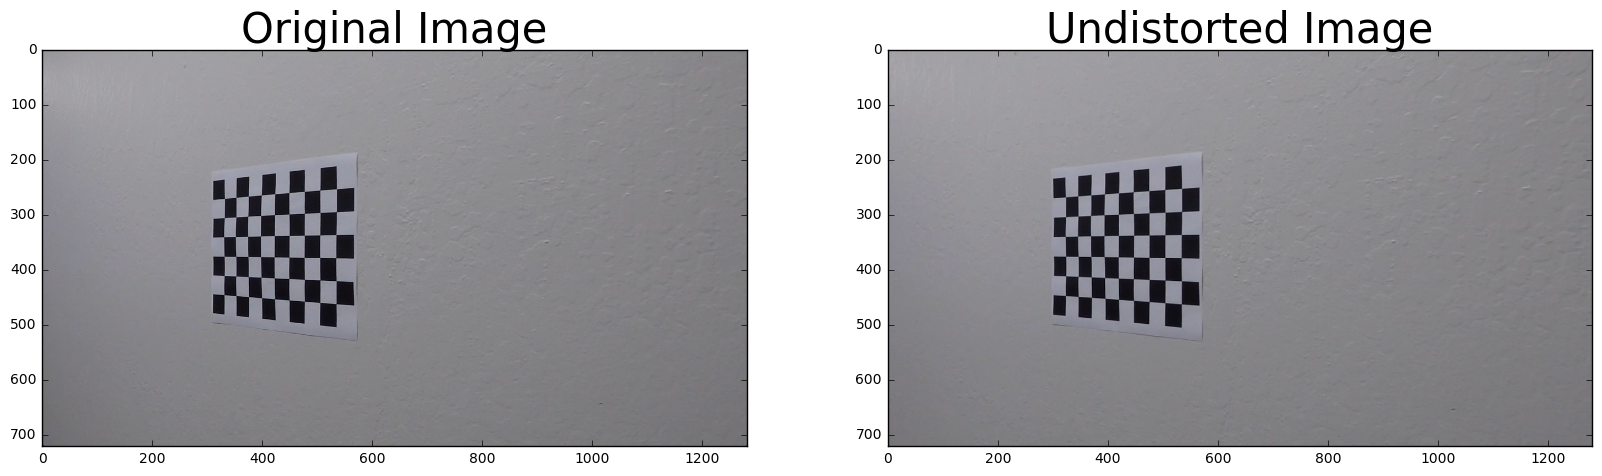

In [61]:
img = mpimg.imread(images[17])
dst = cv2.undistort(img, mtx, dist, None, mtx)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)